In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 設定隨機編號，確保每次執行生成的隨機資料都相同，方便實驗復現
np.random.seed(0)

n_pts = 100 # 每個類別的樣本點數量
D = 2       # 資料的維度（特徵數量）

# 生成第一組資料 Xa (類別 0)：
# 第一個特徵服從平均值 10、標準差 2 的常態分配
# 第二個特徵服從平均值 12、標準差 2 的常態分配
Xa = np.array([np.random.normal(10, 2, n_pts),
               np.random.normal(12, 2, n_pts)])

# 生成第二組資料 Xb (類別 1)：
# 第一個特徵服從平均值 5、標準差 2 的常態分配
# 第二個特徵服從平均值 6、標準差 2 的常態分配
Xb = np.array([np.random.normal(5, 2, n_pts),
               np.random.normal(6, 2, n_pts)])

# 將兩組資料合併。axis=1 代表水平合併，隨後轉置 (.T) 使其符合 (樣本數, 特徵數) 的格式
X = np.append(Xa, Xb, axis=1).T

# 建立標籤資料 (y)：前 100 個為 0，後 100 個為 1，並轉置為行向量
y = (np.append(np.zeros(n_pts), np.ones(n_pts))).T

# 每隔 50 筆資料印出一次，觀察 X 特徵矩陣與 y 標籤向量
print(X[::50])
print(y[::50])

[[13.52810469 15.76630139]
 [ 8.20906688 11.86351679]
 [ 4.26163632  3.3869463 ]
 [ 6.04212975  4.47171215]]
[0. 0. 1. 1.]


Scikit-learn 模型得分:  0.98
預測的準確度是: 98%
Scikit-learn 訓練出的權重 w: [21.58172433 -1.06547642 -1.53184139]


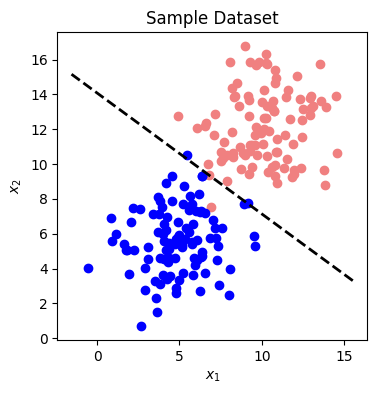

In [6]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 初始化 scikit-learn 的邏輯迴歸模型
scikit_log_reg = sklearn.linear_model.LogisticRegression();

# 使用資料集 X, y 進行模型訓練 (擬合)
scikit_log_reg.fit(X, y)

# 計算模型得分，scikit-learn 預設回傳的是「平均準確度 (Mean Accuracy)」
scikit_score = scikit_log_reg.score(X, y)
print('Scikit-learn 模型得分: ', scikit_score)

# 進行預測並計算準確度
y_predictions = scikit_log_reg.predict(X)
print('預測的準確度是: %d%%' % float((np.dot(y, y_predictions)
        + np.dot(1 - y, 1 - y_predictions)) / float(y.size) * 100))

# 取出截距項 w0
w0 = scikit_log_reg.intercept_[0]

# 取出特徵權重 w1, w2
w_features = scikit_log_reg.coef_[0]

# 整合回你習慣的向量形式 [w0, w1, w2]
w_sklearn = np.insert(w_features, 0, w0)

print("Scikit-learn 訓練出的權重 w:", w_sklearn)

# 繪製決策邊界 (Decision Boundary)
# 這裡使用的 w 是先前手動訓練出來的權重，用來視覺化觀察
x1 = np.array([X[:,0].min()-1, X[:,0].max()+1])
x2 = - w_sklearn.item(0) / w_sklearn.item(2) + x1 * (- w_sklearn.item(1) / w_sklearn.item(2))

fig, ax = plt.subplots(figsize=(4,4))

# 繪製原始資料點
ax.scatter(X[:n_pts,0], X[:n_pts,1], color='lightcoral', label='$Y = 0$')
ax.scatter(X[n_pts:,0], X[n_pts:,1], color='blue', label='$Y = 1$')

# 設定圖表標題與座標軸標籤
ax.set_title('Sample Dataset')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# 繪製決策邊界（黑色虛線）
ax.plot(x1, x2, color='k', ls='--', lw=2)